In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/sales transaction')

In [3]:
import pandas as pd
import numpy as np

df_origin=pd.read_csv('Sales Transaction v.4a.csv')

df_origin.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


# Data Cleaning

In [4]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


deal with missing value

In [5]:
#deal with missing value
df_origin.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [6]:
df_origin[df_origin['CustomerNo'].isnull()].head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom


In [7]:
#drop rows with missing value
df_origin=df_origin.dropna(how='any')
df_origin.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

deal with duplicated values

In [8]:
#deal with duplicated values
df_origin[df_origin.duplicated(keep=False)]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
984,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
985,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1350,581538,12/9/2019,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1354,581538,12/9/2019,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1356,581538,12/9/2019,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535327,536569,12/1/2018,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535959,536592,12/1/2018,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
535960,536592,12/1/2018,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
536189,536528,12/1/2018,22839,3 Tier Cake Tin Green And Cream,25.57,1,15525.0,United Kingdom


In [9]:
df_origin=df_origin.drop_duplicates().reset_index(drop=True)

#Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x7bed23e30220>,
 'caps': [<matplotlib.lines.Line2D at 0x7bed23e30760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bed23fdbf40>],
 'medians': [<matplotlib.lines.Line2D at 0x7bed23e30ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bed23e30f40>],
 'means': []}

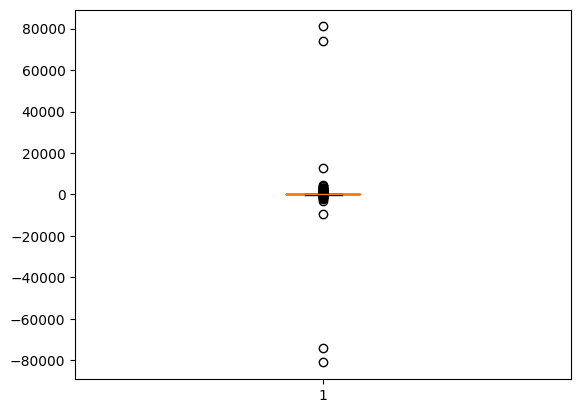

In [10]:
#Outlier Detection and Removal
#distribution of quantity
import matplotlib.pyplot as plt
plt.figure()

plt.boxplot(df_origin['Quantity'])
#negative values are canceled transaction. They have corresponding positive values

In [11]:
#remove rows that are canceled
df_negative=df_origin[df_origin['Quantity']<0]
df_negative

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1611,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1612,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1613,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1614,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1615,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
531090,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
531091,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
531092,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
531093,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [12]:
df_valid=df_origin[df_origin['Quantity']>0].reset_index(drop=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bed21d2dd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7bed21d2e290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bed21d2d9c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bed21d2e7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bed21d2ea70>],
 'means': []}

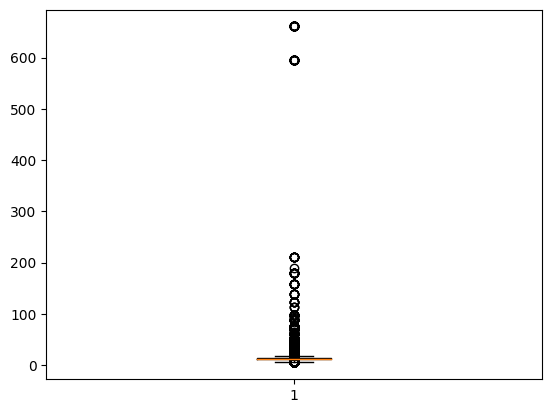

In [13]:
#distribution of price
plt.figure()

plt.boxplot(df_valid['Price'])

Feature engineering

In [14]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522601 entries, 0 to 522600
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  522601 non-null  object 
 1   Date           522601 non-null  object 
 2   ProductNo      522601 non-null  object 
 3   ProductName    522601 non-null  object 
 4   Price          522601 non-null  float64
 5   Quantity       522601 non-null  int64  
 6   CustomerNo     522601 non-null  float64
 7   Country        522601 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.9+ MB


In [15]:
#format conversion
df_valid['CustomerNo']=df_valid['CustomerNo'].astype(int).astype('str')
df_valid['Date']=pd.to_datetime(df_valid['Date'])

In [16]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522601 entries, 0 to 522600
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  522601 non-null  object        
 1   Date           522601 non-null  datetime64[ns]
 2   ProductNo      522601 non-null  object        
 3   ProductName    522601 non-null  object        
 4   Price          522601 non-null  float64       
 5   Quantity       522601 non-null  int64         
 6   CustomerNo     522601 non-null  object        
 7   Country        522601 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 31.9+ MB


Text(0, 0.5, 'Frequency')

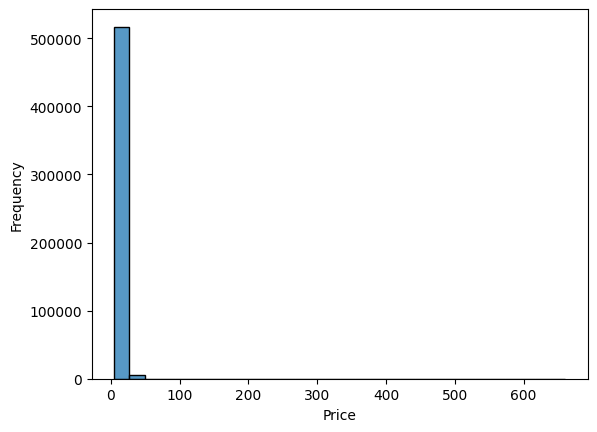

In [17]:
#histogram of price
import seaborn as sns

sns.histplot(df_valid['Price'], bins=30, kde=False)

plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

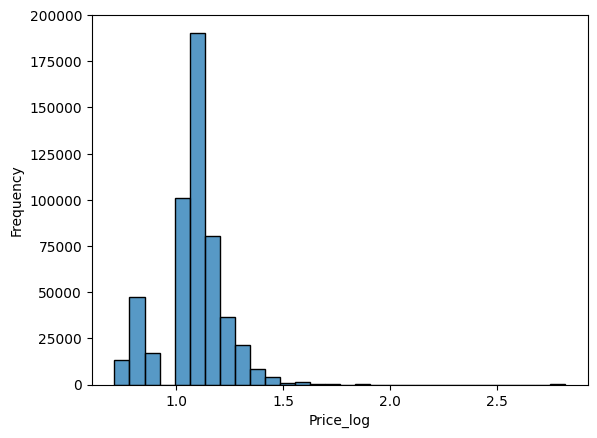

In [18]:
#distrobution of the price data has a very long tail. I will perform a logarithm transformation
df_valid['Price_log']=np.log10(df_valid['Price'])

sns.histplot(df_valid['Price_log'], bins=30, kde=False)

plt.xlabel('Price_log')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

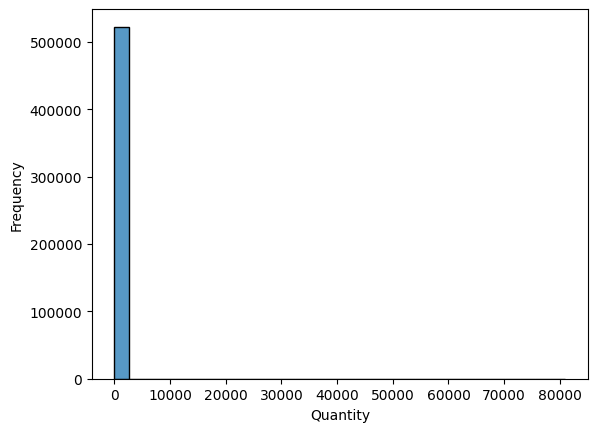

In [19]:
#histogram of quantity
sns.histplot(df_valid['Quantity'], bins=30, kde=False)

plt.xlabel('Quantity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

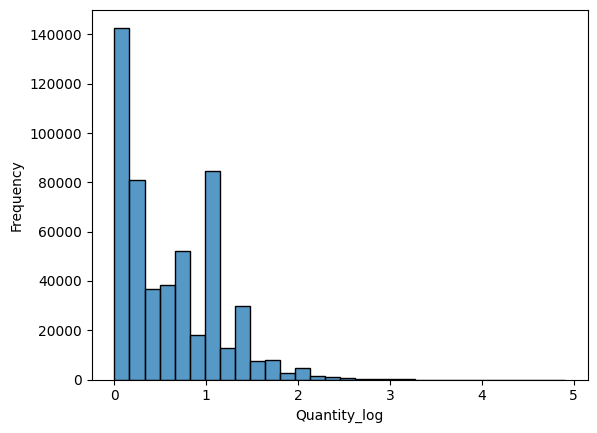

In [20]:
#distrobution of the quantity data has a very long tail. I will perform a logarithm transformation
df_valid['Quantity_log']=np.log10(df_valid['Quantity'])

sns.histplot(df_valid['Quantity_log'], bins=30, kde=False)

plt.xlabel('Quantity_log')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

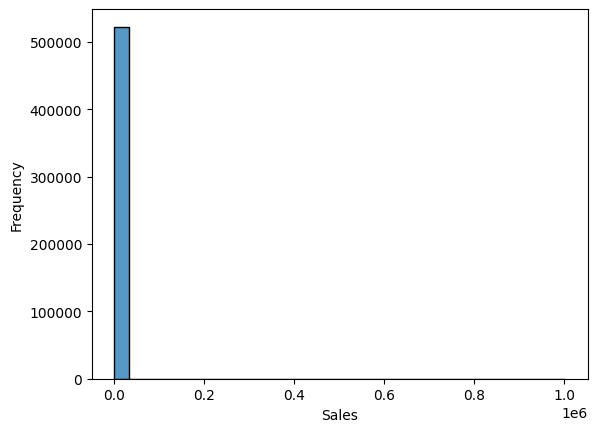

In [21]:
#Create new column sales
df_valid['Sales']=df_valid['Price']*df_valid['Quantity']

plt.figure()

#histogram of quantity
sns.histplot(df_valid['Sales'], bins=30, kde=False)

plt.xlabel('Sales')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

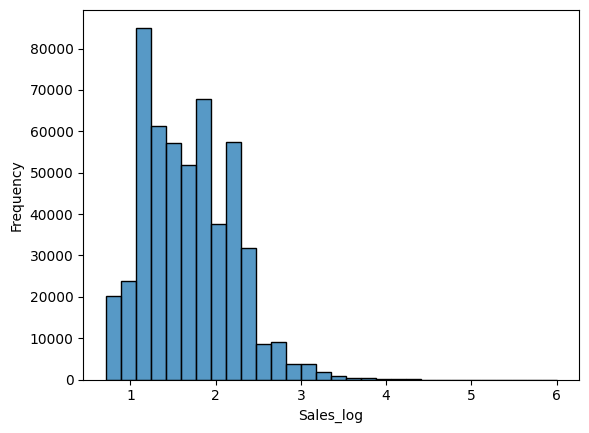

In [22]:
df_valid['Sales_log']=np.log10(df_valid['Sales'])

plt.figure()

sns.histplot(df_valid['Sales_log'], bins=30, kde=False)

plt.xlabel('Sales_log')
plt.ylabel('Frequency')

In [23]:
df_valid.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Price_log,Quantity_log,Sales,Sales_log
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1.331832,1.079181,257.64,2.411013
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,1.027350,1.556303,383.40,2.583652
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,1.061829,1.079181,138.36,2.141011
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,1.027350,1.079181,127.80,2.106531
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,1.077004,0.778151,71.64,1.855156


# Description analysis

Analysis by date

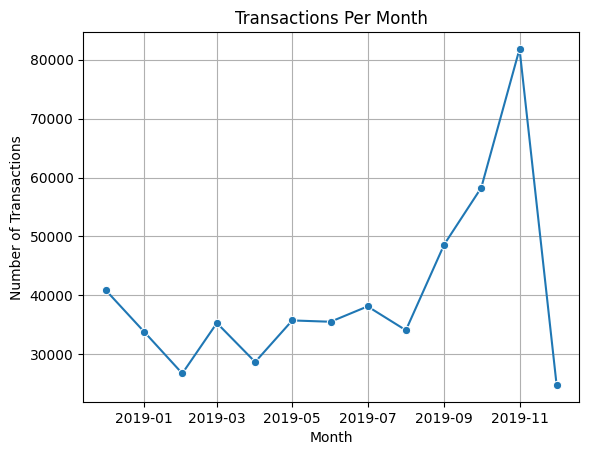

In [24]:
import seaborn as sns

df_monthly_transaction=df_valid[['Date','TransactionNo']].resample('MS',on='Date').count()

plt.figure()
sns.lineplot(data=df_monthly_transaction, x=df_monthly_transaction.index, y='TransactionNo', marker='o')

plt.title('Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

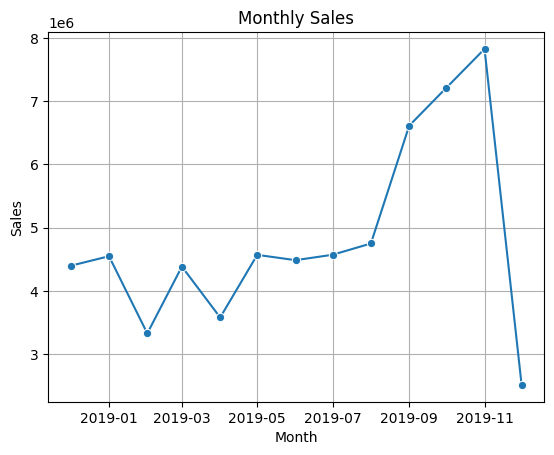

In [25]:
#Monthly sales
df_monthly_sales=df_valid[['Date','Sales']]
df_monthly_sales.set_index('Date',inplace=True)

monthly_data = df_monthly_sales.resample('MS').sum()
plt.figure()
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Sales', marker='o')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

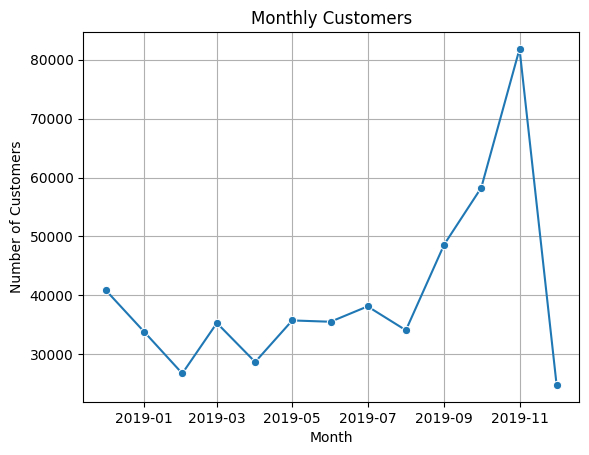

In [26]:
#Monthly customers
df_monthly_customers=df_valid[['Date','CustomerNo']]
df_monthly_customers.set_index('Date',inplace=True)

monthly_customers = df_monthly_customers.resample('MS').count()
plt.figure()
sns.lineplot(data=monthly_customers, x=monthly_customers.index, y='CustomerNo', marker='o')

plt.title('Monthly Customers')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Average Sales')

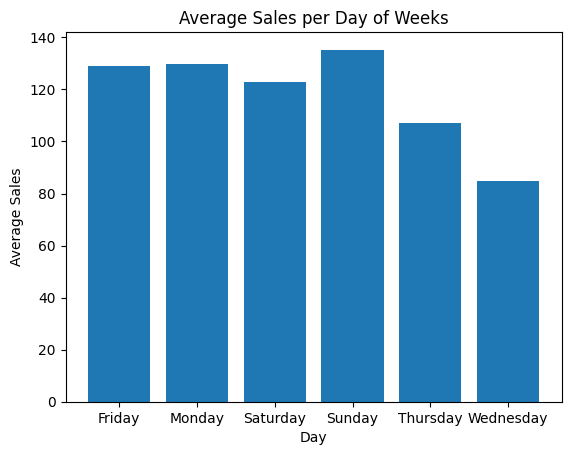

In [27]:
#Average sales per day of a week
df_transactions_dweek=df_valid[['Date','Sales']].groupby(df_valid['Date'].dt.day_name())['Sales'].mean().round(2)

plt.figure()
plt.bar(df_transactions_dweek.index,df_transactions_dweek.values)

plt.title('Average Sales per Day of Weeks')
plt.xlabel('Day')
plt.ylabel('Average Sales')

Analysis by product(important product model)

In [28]:
df_valid['ProductNo'].value_counts()

85123A    2324
85099B    2112
22423     2010
47566     1701
20725     1584
          ... 
84550        1
62096B       1
90084        1
84802B       1
82615        1
Name: ProductNo, Length: 3753, dtype: int64

In [29]:
df_valid['ProductName'].value_counts()

Cream Hanging Heart T-Light Holder     2324
Jumbo Bag Red Retrospot                2112
Regency Cakestand 3 Tier               2010
Party Bunting                          1701
Lunch Bag Red Retrospot                1584
                                       ... 
Crochet Lilac/Red Bear Keyring            1
Purple/Turq Flowers Handbag               1
Pink Crystal Guitar Phone Charm           1
Purple Anemone Artificial Flower          1
Pink Marshmallow Scarf Knitting Kit       1
Name: ProductName, Length: 3753, dtype: int64

Product analysis

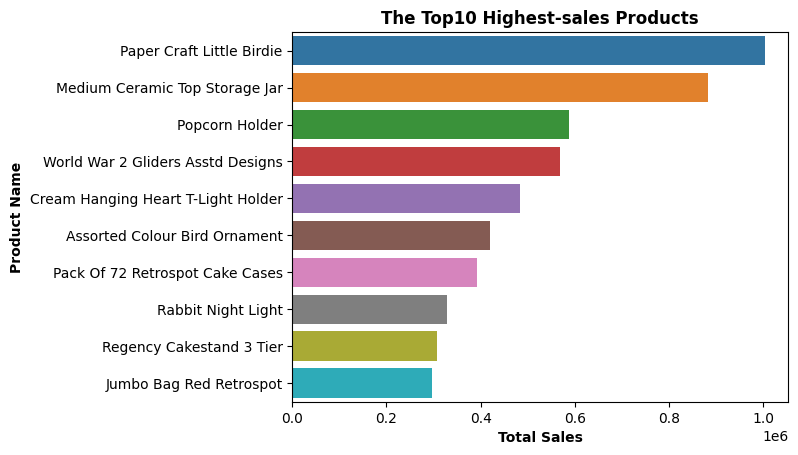

In [30]:
#The top10 highest-sales products
top_products_grouped=df_valid[['ProductName','Sales']].groupby('ProductName')
top_products=top_products_grouped['Sales'].sum().sort_values(ascending=False).head(10)

#make bar charts to show the results
sns.barplot(x=top_products.values, y=top_products.index)
plt.xlabel('Total Sales', fontweight='bold')
plt.ylabel('Product Name', fontweight='bold')
plt.title('The Top10 Highest-sales Products', fontweight='bold')

plt.show()

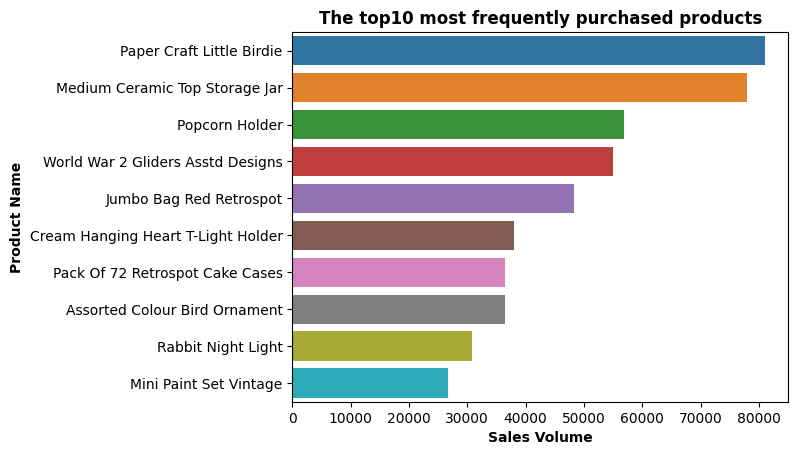

In [31]:
#The top10 most frequently purchased products
top_purchased_grouped=df_valid[['ProductName','Quantity']].groupby('ProductName')
top_purchased=top_purchased_grouped['Quantity'].sum().sort_values(ascending=False).head(10)

#make bar charts to show the results
sns.barplot(x=top_purchased.values, y=top_purchased.index)
plt.xlabel('Sales Volume', fontweight='bold')
plt.ylabel('Product Name', fontweight='bold')
plt.title('The top10 most frequently purchased products', fontweight='bold')

plt.show()

Text(0, 0.5, 'Sales')

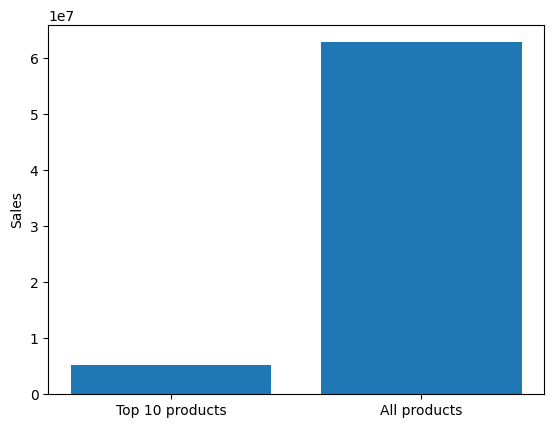

In [32]:
#Sales of all products and top products
top_products_sum=top_products.values.sum()
all_sum=df_valid['Sales'].sum()

plt.figure()

plt.bar(['Top 10 products','All products'],[top_products_sum,all_sum])

plt.ylabel('Sales')

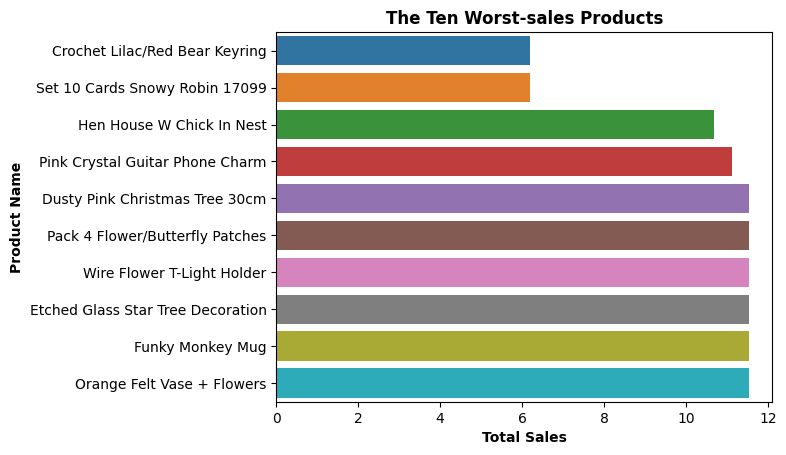

In [33]:
#Products that could be removed
worst_products=top_products_grouped['Sales'].sum().sort_values(ascending=True).head(10)

#make bar charts to show the results
sns.barplot(x=worst_products.values, y=worst_products.index)
plt.xlabel('Total Sales', fontweight='bold')
plt.ylabel('Product Name', fontweight='bold')
plt.title('The Ten Worst-sales Products', fontweight='bold')

plt.show()

Market location analysis

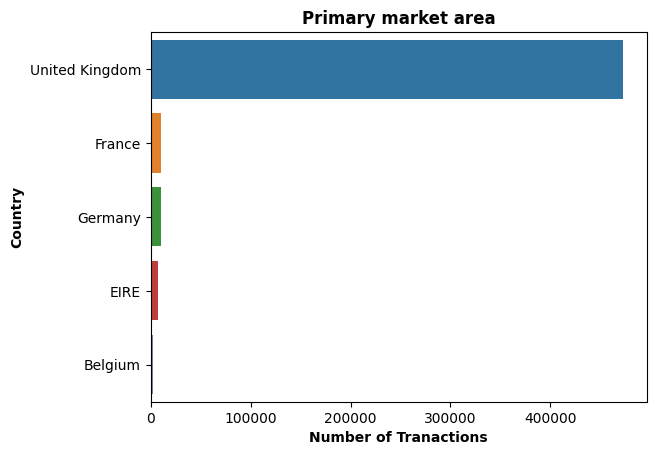

In [34]:
#Primary market area
countries=df_valid['Country'].value_counts().head(5)

#make bar charts to show the results
sns.barplot(x=countries.values, y=countries.index)
plt.xlabel('Number of Tranactions', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt.title('Primary market area', fontweight='bold')

plt.show()

In [35]:
#Heatmap of different countries
!pip install plotly

In [36]:
import plotly.graph_objs as go
from plotly.offline import iplot  #offline map contains countries information

df_countries_heat=pd.DataFrame(df_valid['Country'].value_counts()).reset_index() #calculate number of transactions
df_countries_heat.columns=['Country','Heat']
df_countries_heat['Heat_log']=np.log(df_countries_heat['Heat'])  #make logarithm of quantities of transactions as weight of color
df_countries_heat['text']=df_countries_heat['Country']+'  Transactions:'+df_countries_heat['Heat'].astype(str)

df_countries_heat.head()

,Country,Heat,Heat_log,text
0,United Kingdom,472716,13.066250,United Kingdom Transactions:472716
1,France,10377,9.247347,France Transactions:10377
2,Germany,10221,9.232200,Germany Transactions:10221
3,EIRE,7783,8.959697,EIRE Transactions:7783
4,Belgium,2507,7.826842,Belgium Transactions:2507


In [37]:
#Draw the map
data = dict(
    type='choropleth',
    colorscale='Viridis',
    reversescale=True,
    locations=df_countries_heat['Country'],
    locationmode="country names",
    z=df_countries_heat['Heat_log'],
    text=df_countries_heat['text'],
    colorbar={'title': 'Global Market'}
)

layout = dict(title='Number of Transactions per Country',
              geo=dict(showframe=False, projection={'type': 'mercator'})
              ,width=1200,height=1000)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

Domestic and International Transactions

Text(0, 0.5, 'Sales(Pounds)')

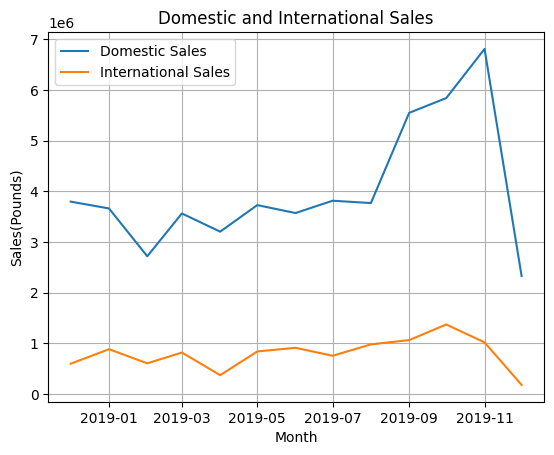

In [38]:
#differ uk transactions and international transactions
df_uk=df_valid[df_valid['Country']=='United Kingdom'][['Date','Sales']]
df_interna=df_valid[df_valid['Country']!='United Kingdom'][['Date','Sales']]

#calculate sales by month
df_uk_month=df_uk.resample('MS',on='Date').sum()
df_interna_month=df_interna.resample('MS',on='Date').sum()

#make a chart with two lines
plt.figure()

plt.plot(df_uk_month.index,df_uk_month['Sales'],label='Domestic Sales')
plt.plot(df_interna_month.index,df_interna_month['Sales'],label='International Sales')

plt.legend()
plt.grid(True)

plt.title('Domestic and International Sales')
plt.xlabel('Month')
plt.ylabel('Sales(Pounds)')

Analysis by quantity

Text(0, 0.5, 'Number of Transaction')

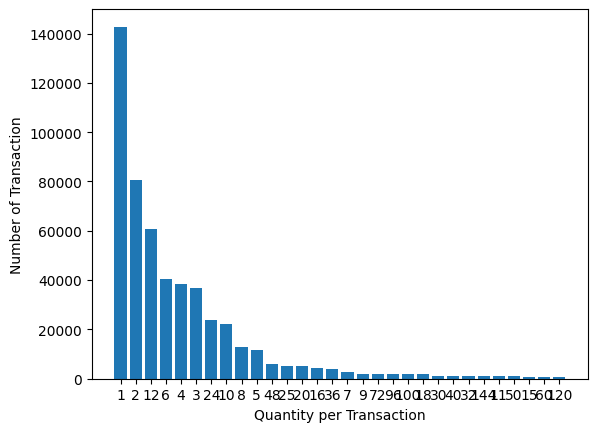

In [39]:
#The distribution of quantity per transaction
df_quantity=pd.DataFrame(df_valid['Quantity'].value_counts().sort_values(ascending=False)).head(30)

plt.bar(df_quantity.index.astype('str'),df_quantity['Quantity'])

plt.xlabel('Quantity per Transaction')
plt.ylabel('Number of Transaction')

# FPGrowth to find product combination often purchased together

In [40]:
df_product_combination=df_valid[['TransactionNo','ProductName']]
all_transactions=df_product_combination['TransactionNo'].unique().tolist() #list of all unique transaction numbers

#Create a new column that is string of all the products in per transactions. Products are splited by ","
df_combination_group=df_product_combination.groupby('TransactionNo')['ProductName'].agg(lambda x: ','.join(x)).reset_index()

#Create a two-dimensional list that contains products in all transactions
combinations=[]
for index, row in df_combination_group.iterrows():
  combination=row['ProductName'].split(',')
  combinations.append(combination)

In [41]:
from  mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

te = TransactionEncoder()
te_ary = te.fit(combinations).transform(combinations)  #Transform the list to fit the model
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = fpgrowth(df, min_support=0.02, use_colnames=True) #The mininal support of single product is 0.02

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7) #The mininal confidence of product combination is 0.7

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Jumbo Bag Pink Polkadot, Jumbo Storage Bag Suki)",(Jumbo Bag Red Retrospot),0.026025,0.105715,0.020870,0.801942,7.585863,0.018119,4.515261,0.891373
1,(Green Regency Teacup And Saucer),(Roses Regency Teacup And Saucer),0.051291,0.053868,0.038809,0.756650,14.046296,0.036046,3.887950,0.979022
2,(Roses Regency Teacup And Saucer),(Green Regency Teacup And Saucer),0.053868,0.051291,0.038809,0.720450,14.046296,0.036046,3.393704,0.981689
3,"(Green Regency Teacup And Saucer, Regency Cake...",(Roses Regency Teacup And Saucer),0.025721,0.053868,0.020618,0.801572,14.880209,0.019232,4.768129,0.957423
4,"(Regency Cakestand 3 Tier, Roses Regency Teacu...",(Green Regency Teacup And Saucer),0.026530,0.051291,0.020618,0.777143,15.151606,0.019257,4.257027,0.959455
5,(Charlotte Bag Pink Polkadot),(Red Retrospot Charlotte Bag),0.037546,0.052251,0.026378,0.702557,13.445749,0.024416,3.186323,0.961737
6,(Pink Regency Teacup And Saucer),(Green Regency Teacup And Saucer),0.038708,0.051291,0.031987,0.826371,16.111380,0.030002,5.463992,0.975700
7,(Pink Regency Teacup And Saucer),(Roses Regency Teacup And Saucer),0.038708,0.053868,0.030269,0.781984,14.516593,0.028184,4.339742,0.968606
8,"(Green Regency Teacup And Saucer, Roses Regenc...",(Pink Regency Teacup And Saucer),0.038809,0.038708,0.027389,0.705729,18.231951,0.025887,3.266690,0.983313
9,"(Green Regency Teacup And Saucer, Pink Regency...",(Roses Regency Teacup And Saucer),0.031987,0.053868,0.027389,0.856240,15.895062,0.025666,6.581334,0.968053


# Differ personal shopper and small businesses

In [42]:
df_dif_pb=df_valid[['CustomerNo','Quantity','Sales']]

df_dif_pb_group=df_dif_pb.groupby('CustomerNo').agg({'Quantity':'sum','Sales':'sum'}).reset_index() #calculate the sum  of quantity and sales per customer
df_dif_pb_group.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerNo,Quantity,Sales
0,12004,104,1509.60
1,12006,2,24.76
2,12008,421,5689.57
3,12013,3,69.96
4,12024,14,149.52


In [43]:
X=df_dif_pb_group[['Quantity','Sales']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++',random_state=2370753) #set 2 culsters, personal shoppers and businesses

kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#evalute the effectiveness of K-means++
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

print("Inertia:", kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.9816962526804408
Inertia: 4699568723922.282


In [45]:
centroids
#the result is good. Customers are divided into high values and low values.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[   985.06481088,  11066.67474076],
       [ 78260.58333333, 891794.43416667]])

In [46]:
df_dif_pb_group['CustomerIsBusiness']=labels
df_valid=pd.merge(df_valid,df_dif_pb_group[['CustomerNo','CustomerIsBusiness']],on='CustomerNo',how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Numbers of businesses and personal shoppers')

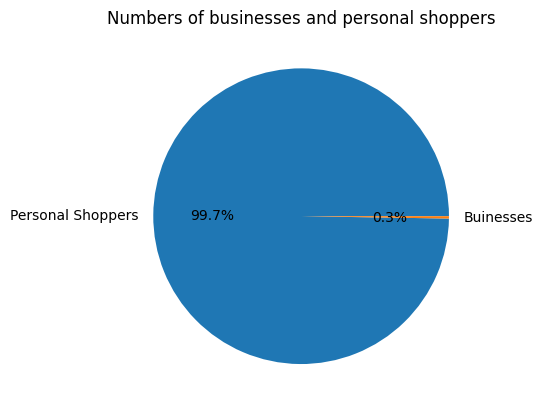

In [47]:
#Number of businesses and personal shoppers
plt.figure()

pie_labels=['Personal Shoppers','Buinesses']
pie_values=df_dif_pb_group['CustomerIsBusiness'].value_counts()

plt.pie(pie_values,labels=pie_labels,autopct = "%.1f%%")
plt.title('Numbers of businesses and personal shoppers')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Sales from personal shoppers and  businesses')

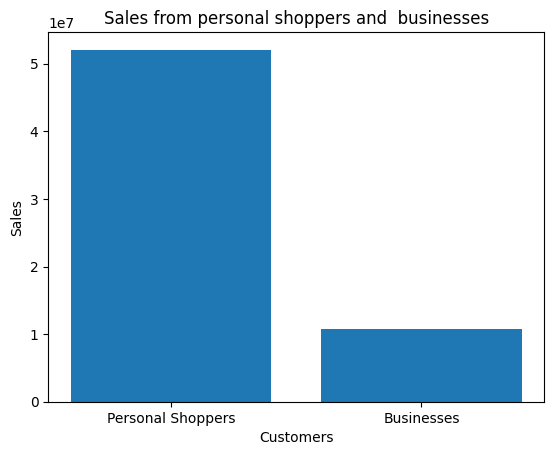

In [48]:
#Sales from personal shoppers and  businesses
df_pb_sales=df_valid[['CustomerIsBusiness','Sales']].groupby('CustomerIsBusiness')['Sales'].sum()
df_pb_sales.index=['Personal Shoppers','Businesses']

plt.figure()

plt.bar(df_pb_sales.index,df_pb_sales.values)
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales from personal shoppers and  businesses')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Average amount of transactions from personal shoppers and  businesses')

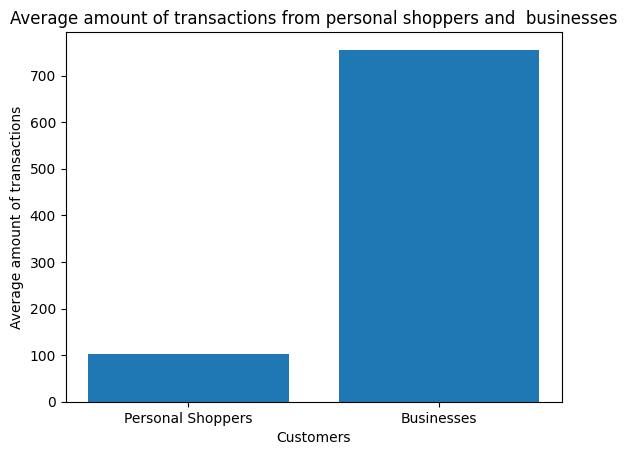

In [49]:
#Average amount of transactions from personal shoppers and  businesses
df_pb_avg=df_valid[['CustomerIsBusiness','Sales']].groupby('CustomerIsBusiness')['Sales'].mean()
df_pb_avg.index=['Personal Shoppers','Businesses']

plt.figure()

plt.bar(df_pb_avg.index,df_pb_avg.values)
plt.xlabel('Customers')
plt.ylabel('Average amount of transactions')
plt.title('Average amount of transactions from personal shoppers and  businesses')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



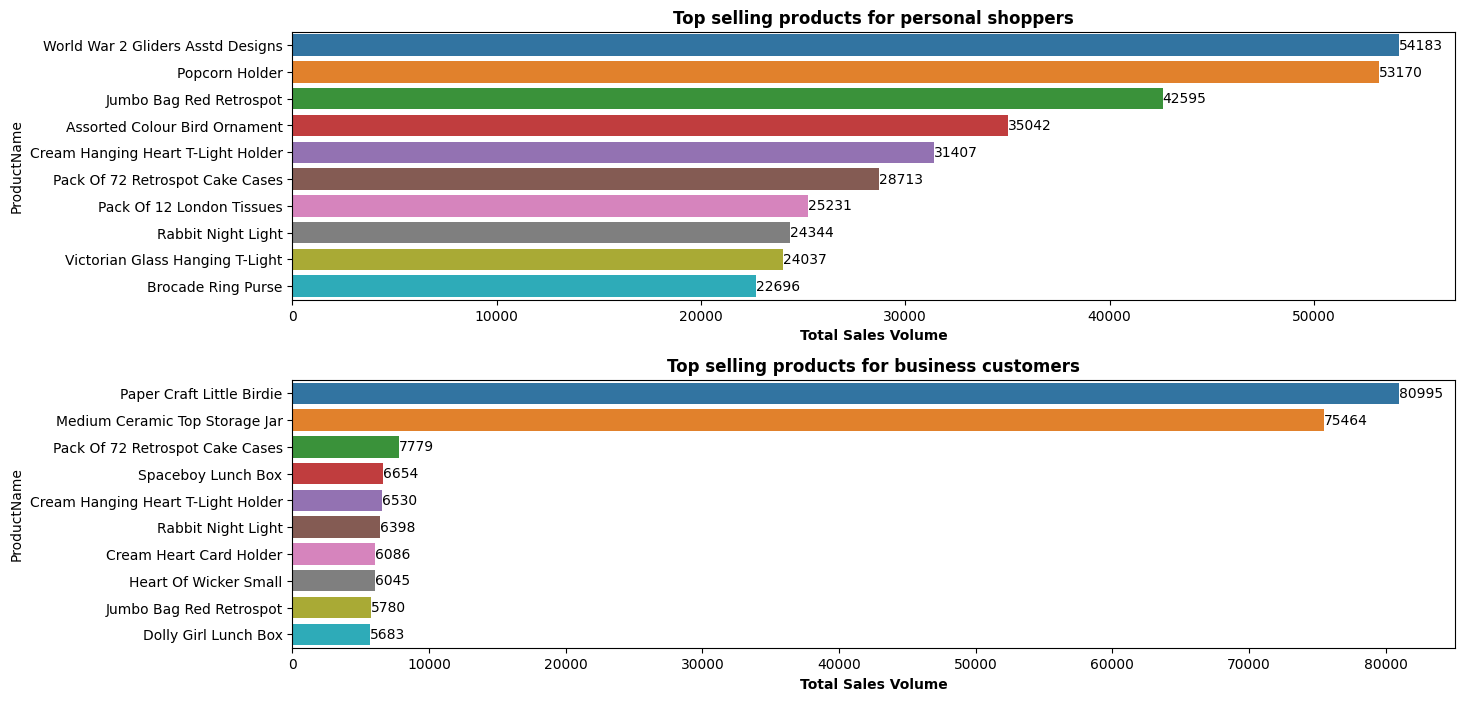

In [50]:
#Top selling products for personal shoppers and businesses
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

df_personal=df_valid[df_valid['CustomerIsBusiness']==0]
df_personal_product=df_personal[['ProductName','Quantity']].groupby('ProductName').sum().sort_values(by='Quantity',ascending=False).head(10)
df_business=df_valid[df_valid['CustomerIsBusiness']==1]
df_business_product=df_business[['ProductName','Quantity']].groupby('ProductName').sum().sort_values(by='Quantity',ascending=False).head(10)

sns.barplot(ax=ax[0],  x=df_personal_product['Quantity'], y=df_personal_product.index)
ax[0].set_xlabel('Total Sales Volume', fontweight='bold')
ax[0].set_title('Top selling products for personal shoppers', fontweight='bold')
ax[0].bar_label(ax[0].containers[0])

sns.barplot(ax=ax[1],  x=df_business_product['Quantity'], y=df_business_product.index)
ax[1].set_xlabel('Total Sales Volume', fontweight='bold')
ax[1].set_title('Top selling products for business customers', fontweight='bold')
ax[1].bar_label(ax[1].containers[0])

plt.subplots_adjust(hspace = 0.3)

# RFM analysis

RFM model

In [51]:
df_valid.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Price_log,Quantity_log,Sales,Sales_log,CustomerIsBusiness
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1.331832,1.079181,257.64,2.411013,0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,1.027350,1.556303,383.40,2.583652,0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,1.061829,1.079181,138.36,2.141011,0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,1.027350,1.079181,127.80,2.106531,0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,1.077004,0.778151,71.64,1.855156,0


In [52]:
#find nearest date
near_date=max(df_valid['Date'])
near_date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Timestamp('2019-12-09 00:00:00')

In [53]:
#Calculate R value
from datetime import datetime

df_valid['Recency']=(datetime.strptime('10/12/2019', "%d/%m/%Y")-df_valid['Date']).dt.days #Calculate the difference between transaction date and 10/12/2019
df_R_grouped=df_valid[['CustomerNo','Recency']].groupby('CustomerNo')
df_R=pd.DataFrame(df_R_grouped['Recency'].min(),columns=['Recency']) #The minimum value of days are recencies

df_R['R'],R_edges=pd.qcut(df_R['Recency'],q=10,labels=False,retbins=True) #Equal frequency binning to calculate R value
df_R['R']=10-df_R['R']
print(R_edges)
df_R

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[  1.   6.  15.  24.  36.  54.  76. 122. 186. 267. 374.]


,Recency,R
CustomerNo,,
12004,228,2
12006,219,2
12008,277,1
12013,360,1
12024,177,3
...,...,...
18280,278,1
18281,181,3
18282,8,9


In [54]:
#Calculate F value
df_F_grouped=df_valid[['CustomerNo','TransactionNo']].groupby('CustomerNo')
df_F=pd.DataFrame(df_F_grouped['TransactionNo'].count())
df_F.columns=['Frequency']
df_F['F'],F_edges=pd.qcut(df_F['Frequency'],q=10,labels=False,retbins=True) #Equal frequency binning to calculate F value
df_F['F']=df_F['F']+1
print(F_edges)
df_F

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[1.000e+00 7.000e+00 1.400e+01 2.300e+01 3.400e+01 5.000e+01 7.100e+01
 1.030e+02 1.596e+02 2.700e+02 7.671e+03]


,Frequency,F
CustomerNo,,
12004,56,6
12006,1,1
12008,203,9
12013,1,1
12024,5,1
...,...,...
18280,10,2
18281,7,1
18282,12,2


In [55]:
#Calculate M value
df_M_grouped=df_valid[['CustomerNo','Sales']].groupby('CustomerNo')
df_M=pd.DataFrame(df_M_grouped['Sales'].sum())
df_M.columns=['Monetary']

df_M['M'],M_edges=pd.qcut(df_M['Monetary'],q=10,labels=False,retbins=True) #Equal frequency binning to calculate F value
df_M['M']=df_M['M']+1

df_M

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Monetary,M
CustomerNo,,
12004,1509.60,3
12006,24.76,1
12008,5689.57,6
12013,69.96,1
12024,149.52,1
...,...,...
18280,623.26,1
18281,576.58,1
18282,1044.86,2


In [56]:
#concat three dataframes
df_RFM=pd.concat([df_R,df_F,df_M],axis=1).reset_index()
df_RFM

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerNo,Recency,R,Frequency,F,Monetary,M
0,12004,228,2,56,6,1509.60,3
1,12006,219,2,1,1,24.76,1
2,12008,277,1,203,9,5689.57,6
3,12013,360,1,1,1,69.96,1
4,12024,177,3,5,1,149.52,1
...,...,...,...,...,...,...,...
4713,18280,278,1,10,2,623.26,1
4714,18281,181,3,7,1,576.58,1
4715,18282,8,9,12,2,1044.86,2
4716,18283,4,10,720,10,11773.90,8


k-means++ cluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/pyt

<function matplotlib.pyplot.show(close=None, block=None)>

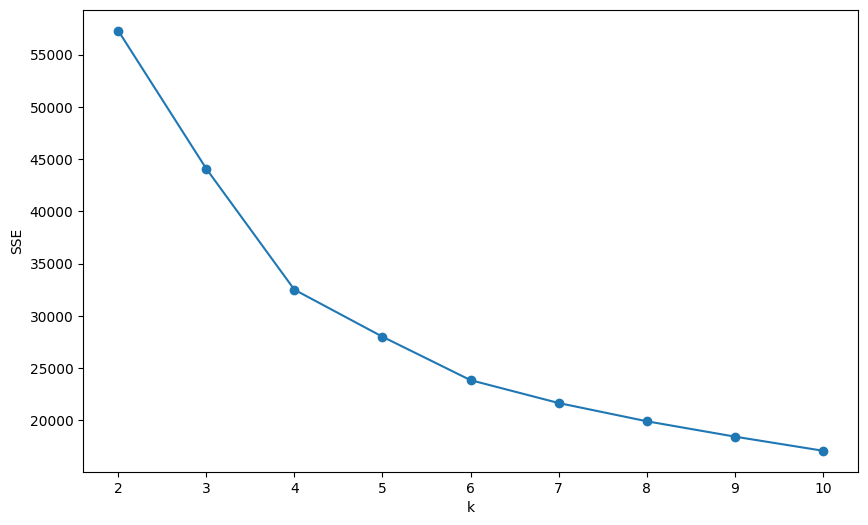

In [57]:
from sklearn.cluster import KMeans
#Elbow Method to determine the optimal number of clusters (k) for K-means clustering
SSE=[] #SSE(sum of the squared errors
X=df_RFM[['R','F','M']]

for k in range(2,11):
    estimator=KMeans(n_clusters=k,init='k-means++')
    estimator.fit(X)
    SSE.append(estimator.inertia_)

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(2,11),SSE,'o-')
plt.show
#In the graph, it can be observed that there is a clear inflection point when K=4

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++',random_state=2370753)

kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#evalute the effectiveness of K-means++
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

print("Inertia:", kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.3672941883298241
Inertia: 32509.815397917093


In [59]:
#result of culstering
df_RFM['labels']=labels
df_category=pd.DataFrame(centroids).reset_index().rename(columns={'index': 'labels'})
df_category

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,labels,0,1,2
0,0,2.504215,2.655939,2.598467
1,1,7.540643,3.942344,3.893195
2,2,3.718841,6.784541,6.939130
3,3,8.354545,8.504545,8.528030


In [60]:
df_category['Customer_Type']=['Uncertain','New','Churn','Valuable'] #write the categories of different groups of customers
df_customer_type=pd.merge(df_RFM,df_category,on='labels',how='left')
df_customer_type['Customer_Type'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Valuable     1320
Uncertain    1305
New          1058
Churn        1035
Name: Customer_Type, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



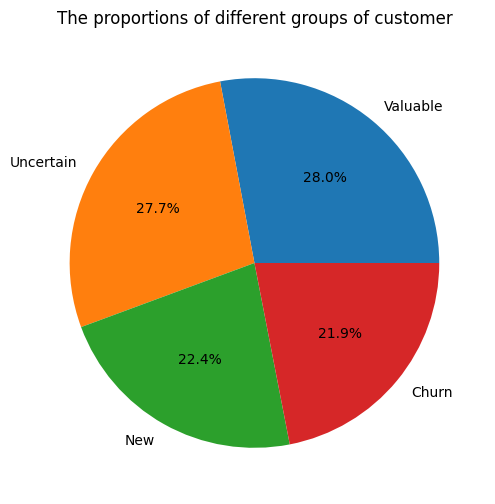

In [61]:
#pie chart of different groups of customers
plt.figure()

plt.pie(df_customer_type['Customer_Type'].value_counts(),labels=df_customer_type['Customer_Type'].value_counts().index,autopct = "%.1f%%")
plt.title('The proportions of different groups of customer')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Totle Sales by Different Groups of Customers')

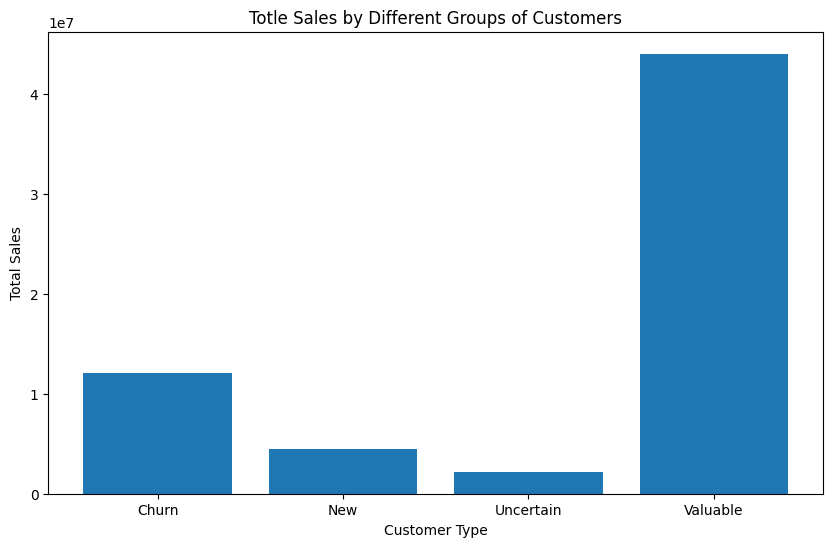

In [62]:
#Totle sales by different groups of customers
df_customers=pd.merge(df_valid,df_customer_type[['CustomerNo','Customer_Type']],how='left',on='CustomerNo')

df_customers_sales_group=df_customers[['Customer_Type','Sales']].groupby('Customer_Type')['Sales'].sum()

plt.figure()

plt.bar(df_customers_sales_group.index,df_customers_sales_group.values)
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Totle Sales by Different Groups of Customers')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Transactions Generated by Different Groups of Customers')

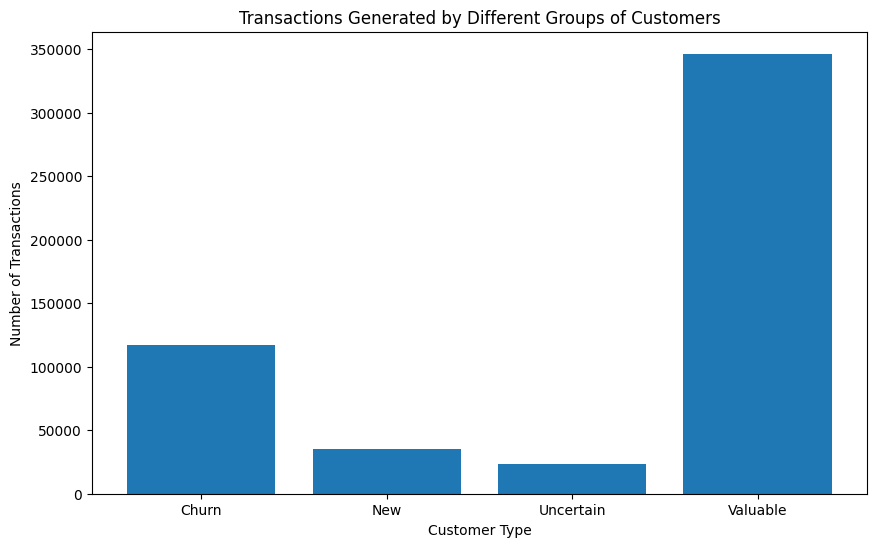

In [63]:
#Transactions Generated by Different Groups of Customers
df_customers_transaction_group=df_customers[['Customer_Type','TransactionNo']].groupby('Customer_Type')['TransactionNo'].count()

plt.figure()

plt.bar(df_customers_transaction_group.index,df_customers_transaction_group.values)
plt.xlabel('Customer Type')
plt.ylabel('Number of Transactions')
plt.title('Transactions Generated by Different Groups of Customers')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0, 0.5, 'Sales(Pounds)')

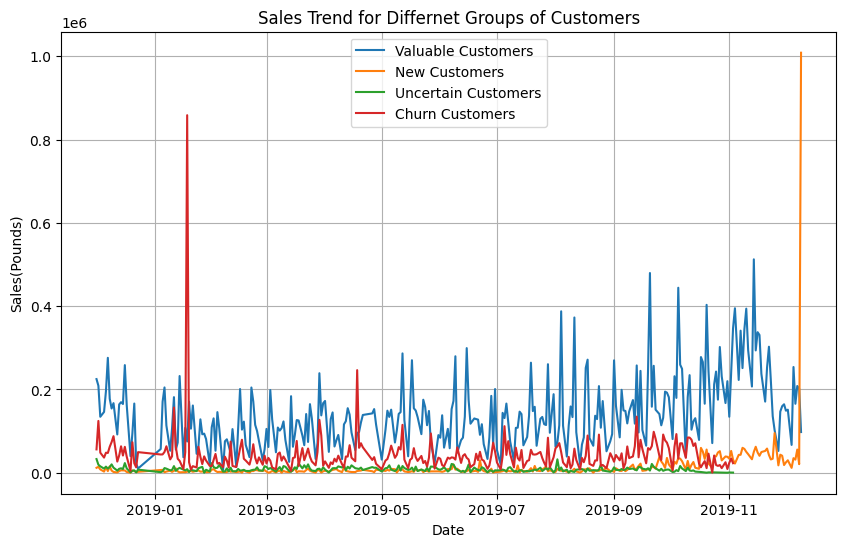

In [64]:
#Sales Trend for Differnet Groups of Customers
df_customer_date_group=df_customers[['Date','Sales','Customer_Type']].groupby(['Date','Customer_Type'])['Sales'].sum().reset_index()

df_Churn_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='Churn']
df_New_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='New']
df_Uncertain_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='Uncertain']
df_Valuable_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='Valuable']

plt.figure()

plt.plot(df_Valuable_date['Date'],df_Valuable_date['Sales'],label='Valuable Customers')
plt.plot(df_New_date['Date'],df_New_date['Sales'],label='New Customers')
plt.plot(df_Uncertain_date['Date'],df_Uncertain_date['Sales'],label='Uncertain Customers')
plt.plot(df_Churn_date['Date'],df_Churn_date['Sales'],label='Churn Customers')

plt.legend()
plt.grid(True)

plt.title('Sales Trend for Differnet Groups of Customers')
plt.xlabel('Date')
plt.ylabel('Sales(Pounds)')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0, 0.5, 'Number of Transactions')

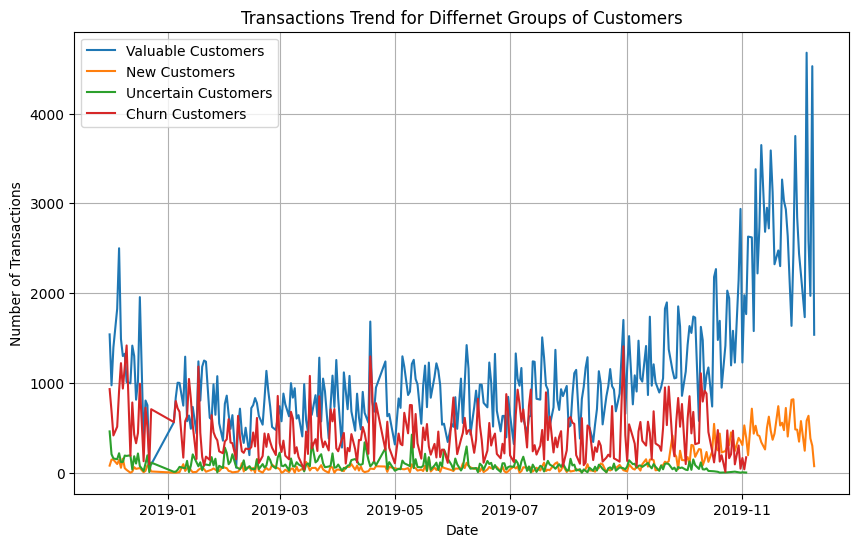

In [65]:
#Transactions Trend for Differnet Types of Customers
df_customer_date_group=df_customers[['Date','TransactionNo','Customer_Type']].groupby(['Date','Customer_Type'])['TransactionNo'].count().reset_index()

df_Churn_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='Churn']
df_New_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='New']
df_Uncertain_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='Uncertain']
df_Valuable_date=df_customer_date_group[df_customer_date_group['Customer_Type']=='Valuable']

plt.figure()

plt.plot(df_Valuable_date['Date'],df_Valuable_date['TransactionNo'],label='Valuable Customers')
plt.plot(df_New_date['Date'],df_New_date['TransactionNo'],label='New Customers')
plt.plot(df_Uncertain_date['Date'],df_Uncertain_date['TransactionNo'],label='Uncertain Customers')
plt.plot(df_Churn_date['Date'],df_Churn_date['TransactionNo'],label='Churn Customers')

plt.legend()
plt.grid(True)

plt.title('Transactions Trend for Differnet Groups of Customers')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

# Time series analysis

In [66]:
df_time_series=df_valid[['Date','Sales']].resample('d',on='Date').sum() #Calculate sales per day

df_time_series[df_time_series['Sales']==0] #find missing values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Sales
Date,
2018-12-04,0.0
2018-12-11,0.0
2018-12-18,0.0
2018-12-24,0.0
2018-12-25,0.0
...,...
2019-11-05,0.0
2019-11-12,0.0
2019-11-19,0.0


In [67]:
df_time_series

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Sales
Date,
2018-12-01,325557.95
2018-12-02,366528.50
2018-12-03,205865.11
2018-12-04,0.00
2018-12-05,195080.25
...,...
2019-12-05,288765.67
2019-12-06,197034.90
2019-12-07,263857.24


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0, 0.5, 'Frequency')

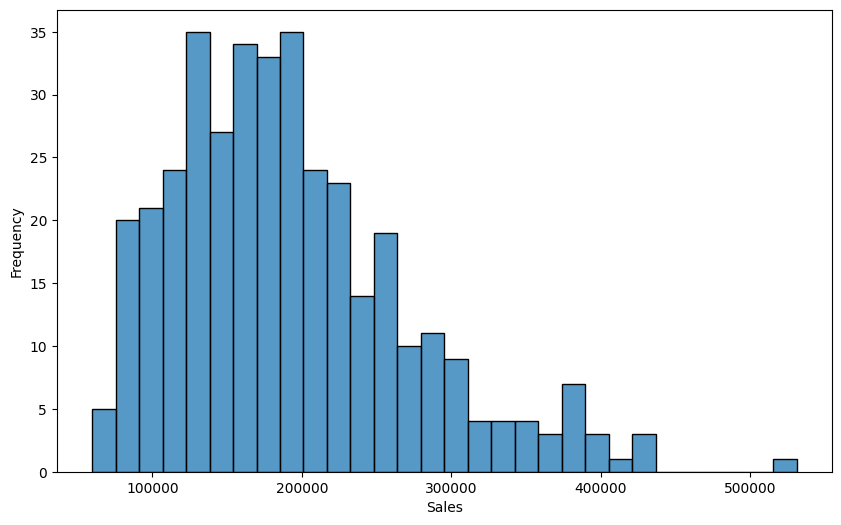

In [68]:
df_time_series['Sales']=df_time_series['Sales'].replace(0,np.nan)

df_time_series['Sales'] = df_time_series['Sales'].interpolate(method='linear').rolling(window=3, min_periods=1).mean() #fill the missing values by moving average

#The distribution of sales
sns.histplot(df_time_series['Sales'], bins=30, kde=False)

plt.xlabel('Sales')
plt.ylabel('Frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



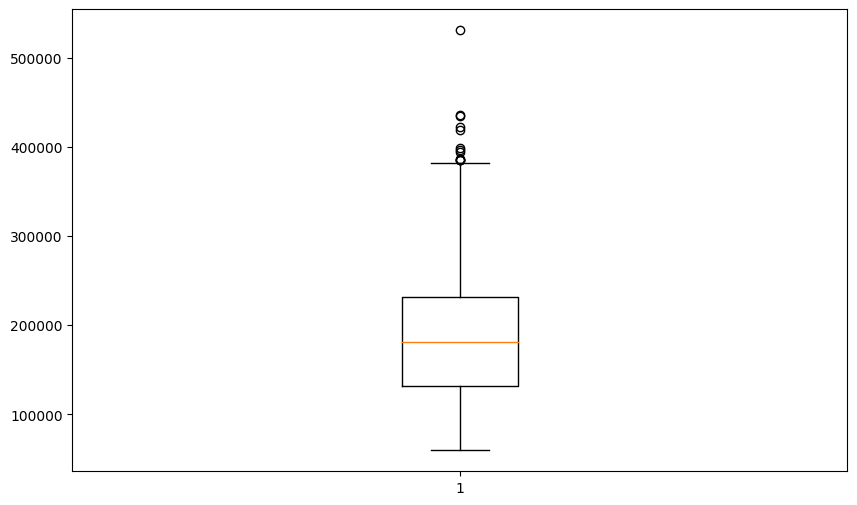

In [69]:
plt.boxplot(df_time_series['Sales'])
plt.show()

In [70]:
#Logarithms of sales
df_time_series['Sales_log']=np.log(df_time_series['Sales'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0, 0.5, 'Frequency')

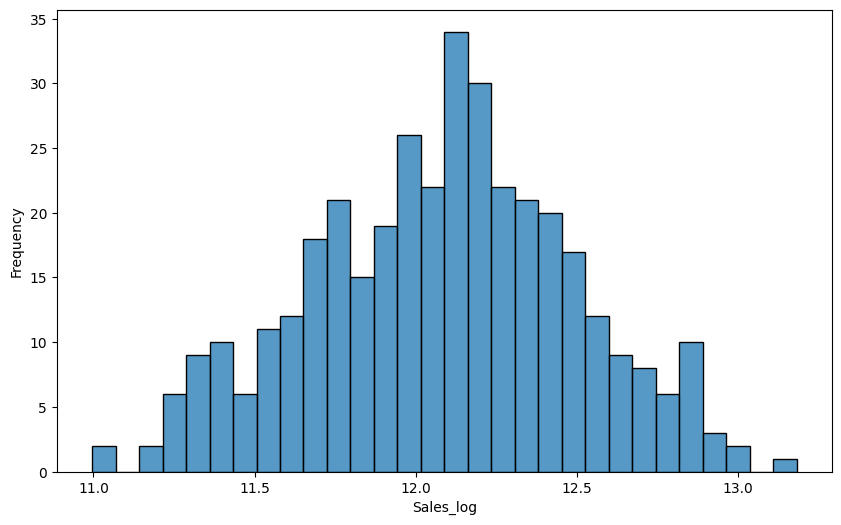

In [71]:
#Distribution of logarithms
sns.histplot(df_time_series['Sales_log'], bins=30, kde=False)

plt.xlabel('Sales_log')
plt.ylabel('Frequency')

In [72]:
#Z-scosre standardisation
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

standardized_sales = scaler.fit_transform(df_time_series[['Sales_log']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0, 0.5, 'Frequency')

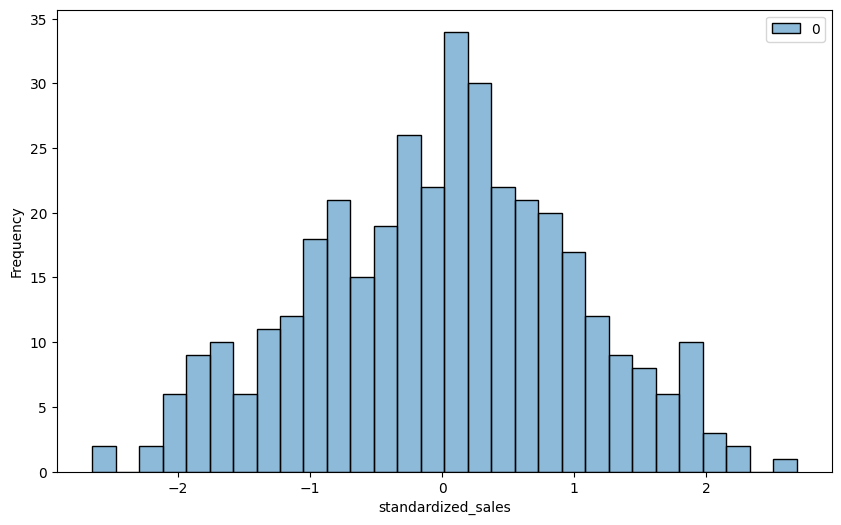

In [73]:
#Distribution of standardisation values
sns.histplot(standardized_sales, bins=30, kde=False)

plt.xlabel('standardized_sales')
plt.ylabel('Frequency')

In [74]:
#Set the values to 7 time steps per row
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 7


X, y = create_sequences(standardized_sales, seq_length)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning:

ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz



In [76]:
#Make the data format could fit the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
#Set the model. Two LSTM layers and one Dense layer
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1),dropout=0.2))
model.add(LSTM(30,dropout=0.2))
model.add(Dense(units=1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)],shuffle=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Epoch 1/50
10/10 [==============================] - 6s 112ms/step - loss: 0.8476 - val_loss: 1.1946
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 0.7198 - val_loss: 0.8840
Epoch 3/50
10/10 [==============================] - 0s 15ms/step - loss: 0.6647 - val_loss: 0.6628
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.6552 - val_loss: 0.5606
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 0.6691 - val_loss: 0.5172
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.6679 - val_loss: 0.5072
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.6789 - val_loss: 0.5016
Epoch 8/50
10/10 [==============================] - 0s 16ms/step - loss: 0.6703 - val_loss: 0.5019
Epoch 9/50
10/10 [==============================] - 0s 14ms/step - loss: 0.6634 - val_loss: 0.5414
Epoch 10/50
10/10 [==============================] - 0s 16ms/step - loss: 0.6661 - val_loss: 0.5432
Epoch 11

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



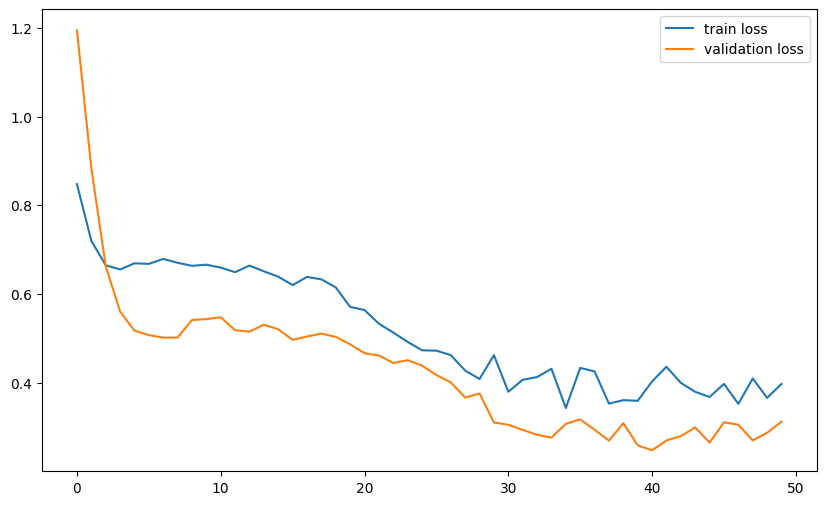

In [78]:
#process of training
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [79]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



3/3 [==============================] - 0s 9ms/step


In [80]:
#Result in train set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f'MSE on train set: {mse:.2f}')

print(f'MAE on train set: {mae:.2f}')
print(f'R² on train set: {r2:.2f}')

MSE on train set: 0.30
MAE on train set: 0.42
R² on train set: 0.63


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:
#result of test set
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'MSE on test set: {mse:.2f}')
print(f'MAE on train set: {mae:.2f}')
print(f'R² on train set: {r2:.2f}')

MSE on test set: 0.31
MAE on train set: 0.43
R² on train set: 0.45


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

